In [8]:
# Importar las bibliotecas necesarias
import sys
import os
import pandas as pd
from sklearn.exceptions import NotFittedError
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Configuracion de seaborn
sns.set_theme(style='whitegrid', context='paper', palette='muted')

# Agregar el directorio de scripts al path
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'scripts'))

# Importar el logger personalizado
from logger import CustomLogger

# Inicializar el logger
logger = CustomLogger(developer='Javier')
app_logger = logger.get_logger('app')
errors_logger = logger.get_logger('errors')

try:
    # Cargar los datos de entrenamiento
    train_data = pd.read_csv('../data/train.csv')
    app_logger.info("Conjunto de datos de entrenamiento cargado exitosamente.")
except FileNotFoundError:
    errors_logger.error("No se pudo encontrar el archivo de datos de entrenamiento.")
    raise
except Exception as e:
    errors_logger.error(f"Error al cargar los datos de entrenamiento: {str(e)}")
    raise

# Cargamos test.csv
try:
    test_data = pd.read_csv('../data/test.csv')
    app_logger.info("Conjunto de datos de test cargado exitosamente.")
except FileNotFoundError:
    errors_logger.error("No se pudo encontrar el archivo de datos de test.")
    raise

# Mostrar las primeras filas del conjunto de datos
train_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
# Valores faltantes
print("Valores faltantes por columna:")
valores_faltantes = train_data.isnull().sum()
porcentaje_faltantes = 100 * train_data.isnull().sum() / len(train_data)
tabla_faltantes = pd.concat([valores_faltantes, porcentaje_faltantes], axis=1, keys=['Total', 'Porcentaje'])
print(tabla_faltantes[tabla_faltantes['Total'] > 0].sort_values('Total', ascending=False))

# Filas duplicadas
filas_duplicadas = train_data.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {filas_duplicadas}")

# Registrar en el log
if valores_faltantes.sum() > 0:
    app_logger.info(f"Se encontraron {valores_faltantes.sum()} valores faltantes en total.")
else:
    app_logger.info("No se encontraron valores faltantes en el conjunto de datos.")

if filas_duplicadas > 0:
    app_logger.warning(f"Se encontraron {filas_duplicadas} filas duplicadas en el conjunto de datos.")
else:
    app_logger.info("No se encontraron filas duplicadas en el conjunto de datos.")


Valores faltantes por columna:
              Total  Porcentaje
PoolQC         1453   99.520548
MiscFeature    1406   96.301370
Alley          1369   93.767123
Fence          1179   80.753425
MasVnrType      872   59.726027
FireplaceQu     690   47.260274
LotFrontage     259   17.739726
GarageType       81    5.547945
GarageYrBlt      81    5.547945
GarageFinish     81    5.547945
GarageQual       81    5.547945
GarageCond       81    5.547945
BsmtFinType2     38    2.602740
BsmtExposure     38    2.602740
BsmtFinType1     37    2.534247
BsmtCond         37    2.534247
BsmtQual         37    2.534247
MasVnrArea        8    0.547945
Electrical        1    0.068493

Número de filas duplicadas: 0


In [10]:
# Valores faltantes en el conjunto de test
print("Valores faltantes por columna en el conjunto de test:")
valores_faltantes_test = test_data.isnull().sum()
porcentaje_faltantes_test = 100 * test_data.isnull().sum() / len(test_data)
tabla_faltantes_test = pd.concat([valores_faltantes_test, porcentaje_faltantes_test], axis=1, keys=['Total', 'Porcentaje'])
print(tabla_faltantes_test[tabla_faltantes_test['Total'] > 0].sort_values('Total', ascending=False))

# Filas duplicadas en el conjunto de test
filas_duplicadas_test = test_data.duplicated().sum()
print(f"\nNúmero de filas duplicadas en el conjunto de test: {filas_duplicadas_test}")

# Registrar en el log para el conjunto de test
if valores_faltantes_test.sum() > 0:
    app_logger.info(f"Se encontraron {valores_faltantes_test.sum()} valores faltantes en total en el conjunto de test.")
else:
    app_logger.info("No se encontraron valores faltantes en el conjunto de test.")

if filas_duplicadas_test > 0:
    app_logger.warning(f"Se encontraron {filas_duplicadas_test} filas duplicadas en el conjunto de test.")
else:
    app_logger.info("No se encontraron filas duplicadas en el conjunto de test.")


Valores faltantes por columna en el conjunto de test:
              Total  Porcentaje
PoolQC         1456   99.794380
MiscFeature    1408   96.504455
Alley          1352   92.666210
Fence          1169   80.123372
MasVnrType      894   61.274846
FireplaceQu     730   50.034270
LotFrontage     227   15.558602
GarageCond       78    5.346127
GarageYrBlt      78    5.346127
GarageQual       78    5.346127
GarageFinish     78    5.346127
GarageType       76    5.209047
BsmtCond         45    3.084304
BsmtExposure     44    3.015764
BsmtQual         44    3.015764
BsmtFinType1     42    2.878684
BsmtFinType2     42    2.878684
MasVnrArea       15    1.028101
MSZoning          4    0.274160
BsmtFullBath      2    0.137080
BsmtHalfBath      2    0.137080
Functional        2    0.137080
Utilities         2    0.137080
GarageCars        1    0.068540
GarageArea        1    0.068540
TotalBsmtSF       1    0.068540
KitchenQual       1    0.068540
BsmtUnfSF         1    0.068540
BsmtFinSF2        

## Missing Columns on Train
- Pool Quality Col has 99,52% missing values, but we still have Pool Area wich i think is more important than PoolQc
- MiscFeature Col has 96.30% missing values. We also have MiscVal that represents the value of Misc Feature.
    - Each Misc Feature has a unique value or has multiple values?? If each MiscFeature has a unique value we can drop MiscFeature and leave Misc Val because we wont lose info, otherwise, drop both.
- Alley has 93% missing values, no other col is related to this one so we can directly drop it.

## Missing Columns on Test
- We can observe the same tendency


## Verificar la relación unívoca entre MiscFeature y MiscVal

In [11]:
# Crear un DataFrame con MiscFeature y MiscVal
misc_df = train_data[['MiscFeature', 'MiscVal']]

# Agrupar por MiscFeature y contar los valores únicos de MiscVal
relacion_misc = misc_df.groupby('MiscFeature')['MiscVal'].nunique().reset_index()
relacion_misc.columns = ['MiscFeature', 'Valores_Unicos_MiscVal']

print("Relación entre MiscFeature y MiscVal:")
print(relacion_misc)

# Verificar si cada MiscFeature tiene un único valor de MiscVal
es_univoca = (relacion_misc['Valores_Unicos_MiscVal'] == 1).all()

if es_univoca:
    print("\nLa relación entre MiscFeature y MiscVal es unívoca.")
    app_logger.info("La relación entre MiscFeature y MiscVal es unívoca. Se puede considerar dejar una columna.")
else:
    print("\nLa relación entre MiscFeature y MiscVal no es unívoca.")
    app_logger.info("La relación entre MiscFeature y MiscVal no es unívoca. Se recomienda eliminar ambas columnas.")

# Mostrar ejemplos de MiscFeature con múltiples valores de MiscVal
if not es_univoca:
    print("\nEjemplos de MiscFeature con múltiples valores de MiscVal:")
    ejemplos_multiples = relacion_misc[relacion_misc['Valores_Unicos_MiscVal'] > 1]
    for _, row in ejemplos_multiples.iterrows():
        feature = row['MiscFeature']
        valores = misc_df[misc_df['MiscFeature'] == feature]['MiscVal'].unique()
        print(f"MiscFeature: {feature}")
        print(f"Valores de MiscVal: {valores}\n")


Relación entre MiscFeature y MiscVal:
  MiscFeature  Valores_Unicos_MiscVal
0        Gar2                       2
1        Othr                       2
2        Shed                      18
3        TenC                       1

La relación entre MiscFeature y MiscVal no es unívoca.

Ejemplos de MiscFeature con múltiples valores de MiscVal:
MiscFeature: Gar2
Valores de MiscVal: [15500  8300]

MiscFeature: Othr
Valores de MiscVal: [3500    0]

MiscFeature: Shed
Valores de MiscVal: [ 700  350  500  400  480  450 1200  800 2000  600 1300   54  620  560
 1400    0 1150 2500]



In [12]:
# Filtrar columnas con más del 90% de valores faltantes
umbral_faltantes = 0.9
columnas_a_eliminar = tabla_faltantes[tabla_faltantes['Porcentaje'] > 90].index
train_data_filtrado = train_data.drop(columns=columnas_a_eliminar)

# Registrar en el log
if len(columnas_a_eliminar) > 0:
    app_logger.info(f"Se eliminaron {len(columnas_a_eliminar)} columnas con más del 90% de valores faltantes: {', '.join(columnas_a_eliminar)}")
    print(f"Columnas eliminadas: {', '.join(columnas_a_eliminar)}")
else:
    app_logger.info("No se encontraron columnas con más del 90% de valores faltantes.")
    print("No se encontraron columnas con más del 90% de valores faltantes.")

# Mostrar la forma del nuevo conjunto de datos
print(f"\nForma del conjunto de datos original: {train_data.shape}")
print(f"Forma del conjunto de datos filtrado: {train_data_filtrado.shape}")


Columnas eliminadas: Alley, PoolQC, MiscFeature

Forma del conjunto de datos original: (1460, 81)
Forma del conjunto de datos filtrado: (1460, 78)


In [13]:
train_data_filtrado

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,MnPrv,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,GdPrv,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,4,2010,WD,Normal,142125


In [14]:
# Importar sweetviz
import sweetviz as sv


# Crear un informe de análisis exploratorio de datos con sweetviz
informe = sv.analyze(train_data_filtrado)

# Mostrar el informe en el navegador
informe.show_html("informe_sweetviz.html")



print("Se ha generado un informe de análisis exploratorio de datos con sweetviz.")
print("Por favor, abra el archivo 'informe_sweetviz.html' en su navegador para ver el informe completo.")

# Registrar en el log
app_logger.info("Se ha generado un informe de análisis exploratorio de datos utilizando sweetviz.")


/home/dev/.pyenv/versions/3.9.13/envs/House_Price_Regression_Kaggle/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:10 -> (00:00 left)


Report informe_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Se ha generado un informe de análisis exploratorio de datos con sweetviz.
Por favor, abra el archivo 'informe_sweetviz.html' en su navegador para ver el informe completo.


In [15]:
#import IPython 
#IPython.display.HTML("informe_sweetviz.html")

In [16]:
informe = sv.analyze(train_data_filtrado, target_feat="SalePrice")
informe.show_html("informe_sweetviz_target.html")

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:11 -> (00:00 left)

Report informe_sweetviz_target.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [18]:
# # Importar dtale
# import dtale

# # Crear una instancia de dtale con los datos filtrados
# d = dtale.show(train_data_filtrado)

# # Mostrar el enlace para acceder a la interfaz de dtale
# print("Se ha generado un análisis interactivo con dtale.")
# print(f"Por favor, acceda a la siguiente URL para explorar los datos: {d._url}")

# # Registrar en el log
# app_logger.info("Se ha generado un análisis interactivo utilizando dtale.")


Meter pairplot

Aqui viene lo de david, cleaning, feature_engineering, missing values treatment, etc

Voy a tirar a ahacer la parte del flujo de feature selection con clustering mientras que se termina el preprocessing

# Feature Selection

Firstable, since we have 81 variables we group them using clustering and select one or some of them within each cluster. 

## Feature Clustering

In [19]:
train_data_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

We only keep numerical features

In [20]:
df = train_data_filtrado.copy()
columns_numerical = []
for i in df:
    if df[i].dtype == 'int64' or df[i].dtype == 'float64'  :
     columns_numerical.append(i)

Removing id and target

In [21]:
columns_numerical.remove('Id')

In [22]:
columns_numerical.remove('SalePrice')

In [23]:
df_to_feat_cluster = df.loc[:,columns_numerical]

In [24]:
df_to_feat_cluster

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,500,349,0,0,0,0,0,0,2,2010
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,240,366,0,112,0,0,0,0,4,2010


We fill none values by 0 only for being able to finish this part. This will be correctly done in previous stages

In [25]:
df_to_feat_cluster.fillna(0,inplace=True)

In [26]:
#Just checking there are not nan or none values
# df_to_feat_cluster.loc[:,['LotFrontage']].value_counts()
# df_to_feat_cluster.loc[:,['LotFrontage']].isna().sum()

We do need scales since distance matrix is going to be needed for hierchachil clustering

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
scaler.fit(df_to_feat_cluster)
df_to_feat_cluster_scaled = scaler.transform(df_to_feat_cluster)
df_to_feat_cluster_scaled = pd.DataFrame(df_to_feat_cluster_scaled,columns=columns_numerical)

Let´s take a look to dataframe shape

In [29]:
df_to_feat_cluster_scaled.shape

(1460, 36)

We transpose columns to rows because of we want to cluster features, we dont want cluster rows by now

In [30]:
df_to_feat_cluster_scaled_trans = df_to_feat_cluster_scaled.transpose()
df_to_feat_cluster_scaled_trans.shape

(36, 1460)

We want to see how many cluster we could have, just to visualize we calculate distance manually and plot dendogram

In [31]:
import scipy.spatial.distance as ssd



In [37]:
distMatrix = ssd.pdist(df_to_feat_cluster_scaled_trans, metric='euclidean') 

In [33]:
distMatrix[0:10]

array([59.56397255, 57.69021372, 53.14816172, 55.61656395, 53.27924174,
       52.92922963, 53.39631947, 55.89204226, 55.78255867, 57.71496932])

In [34]:
len(distMatrix)

630

In [39]:
# Just quick check pdist is working as expected
x1 = np.array(df_to_feat_cluster_scaled_trans.iloc[0,:])
x2 = np.array(df_to_feat_cluster_scaled_trans.iloc[1,:])
np.isnan(x1).sum()
np.isnan(x2).sum()
distance = np.linalg.norm(x1 - x2)
distance

59.563972554283055

In [40]:
# Just check we got all distance between pair features
j = 0
for i in range(0,36):
    if i!= 0:
     j= j+i
print(j)


630


In [41]:
distArray = ssd.squareform(distMatrix)


In [42]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

In [43]:
# mergings = linkage(distArray,
#                    # method='complete',
#                    method = 'ward', #minimiza errores entendiendo error como la suma cuadratica de las distancia al centroide (SSM). Calcula el SSM entre dos clusters y el SSM de cada cluster. Posteriormente resta el SSM entre cluster el SSM de cada uno de los dos clusters
#                    metric= 'euclidean'
#                    )

In [44]:
# mergings

In [45]:
# dendrogram(mergings,
#            labels=columns_numerical,
#            leaf_rotation=90,
#            leaf_font_size=6,
# )
# plt.show()

In [46]:
mergings = linkage(distArray,
                   method='complete',
                   #method = 'ward', #minimiza errores entendiendo error como la suma cuadratica de las distancia al centroide (SSM). Calcula el SSM entre dos clusters y el SSM de cada cluster. Posteriormente resta el SSM entre cluster el SSM de cada uno de los dos clusters
                   metric= 'euclidean'
                   )

/tmp/ipykernel_653497/103467209.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  mergings = linkage(distArray,


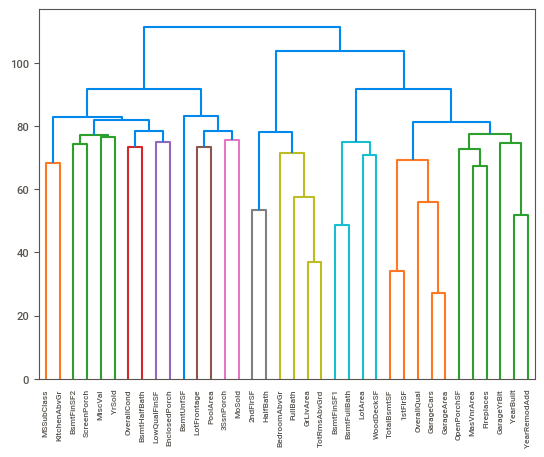

In [47]:
dendrogram(mergings,
           labels=columns_numerical,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

Measuring cluster quality. Quality here means two things:
- Tight clusters
- Sampled in each cluster bunched together

Silhouette Score: This measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where a higher value indicates better clustering.

Davies-Bouldin Index: This metric evaluates the average similarity ratio of each cluster with the cluster that is most similar to it. Lower values indicate better clustering.

Dunn Index: This measures the ratio of the minimum inter-cluster distance to the maximum intra-cluster distance. Higher values indicate better clustering.

In [48]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [53]:
max_cluster_size = 35
scores = []

In [54]:
for i in range(2,max_cluster_size+1):
    clustering = AgglomerativeClustering(n_clusters=i)
    labels = clustering.fit_predict(df_to_feat_cluster_scaled_trans)
    score = silhouette_score(df_to_feat_cluster_scaled_trans, labels)
    scores.append(score)

  

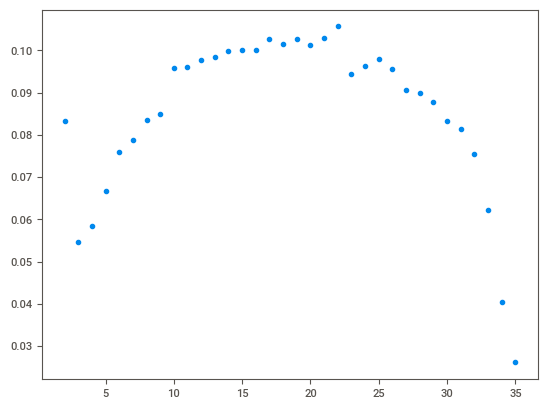

In [55]:
plt.scatter(range(2,max_cluster_size+1),scores)

It seems results are close to 0 what means decision boundary is not clear, anyway we chose the best n cluster since it gives higher silouette score.

In [58]:
n_clusters_df = pd.DataFrame([i for i in range(2,max_cluster_size+1)],columns=["n_clusters"])
siloutte_scores_df = pd.DataFrame(scores,columns=["siloutte"])
clustering_results = pd.concat(objs=[n_clusters_df,siloutte_scores_df],axis=1)
max_sil = np.max(clustering_results["siloutte"])
n_clusters_selected = clustering_results.loc[clustering_results["siloutte"]==max_sil,["n_clusters"]].values[0][0]

We fit our best clustering configuration

In [60]:
clustering = AgglomerativeClustering(n_clusters=n_clusters_selected)
labels = clustering.fit_predict(df_to_feat_cluster_scaled_trans)

In [62]:
add_clusters = pd.DataFrame(labels,columns=["feature_cluster"])
add_clusters.index = df_to_feat_cluster_scaled_trans.index
add_clusters.sort_values(by="feature_cluster")

,feature_cluster
TotRmsAbvGrd,0
BedroomAbvGr,0
HalfBath,0
2ndFlrSF,0
GrLivArea,0
BsmtUnfSF,1
TotalBsmtSF,1
1stFlrSF,1
MSSubClass,2
KitchenAbvGr,2


In [65]:
columnas = []
for i in df_to_feat_cluster_scaled_trans.columns:
    columnas.append(str(i))
columnas.append("feature_cluster")
clustering_df = pd.concat(  objs=[df_to_feat_cluster_scaled_trans,add_clusters],
                            axis=1
                            )
clustering_df.columns = columnas
clustering_df

,0,1,2,3,4,5,6,7,8,9,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,feature_cluster
MSSubClass,0.073375,-0.872563,0.073375,0.309859,0.073375,-0.163109,-0.872563,0.073375,-0.163109,3.147673,...,-0.872563,2.911188,-0.872563,-0.872563,0.073375,-0.872563,0.309859,-0.872563,-0.872563,2
LotFrontage,0.212877,0.645747,0.299451,0.068587,0.761179,0.790037,0.501457,-1.662893,-0.191135,-0.219993,...,0.588031,-0.652863,0.934327,0.126303,0.126303,0.790037,0.241735,0.299451,0.501457,18
LotArea,-0.207142,-0.091886,0.073480,-0.096897,0.375148,0.360616,-0.043379,-0.013513,-0.440659,-0.310370,...,-0.125761,-0.685702,0.671505,-0.302353,-0.260560,0.266407,-0.147810,-0.080160,-0.058112,4
OverallQual,0.651479,-0.071836,0.651479,0.651479,1.374795,-0.795151,1.374795,0.651479,0.651479,-0.795151,...,1.374795,-0.795151,-0.795151,0.651479,-0.071836,-0.071836,0.651479,-0.795151,-0.795151,3
OverallCond,-0.517200,2.179628,-0.517200,-0.517200,-0.517200,-0.517200,-0.517200,0.381743,-0.517200,0.381743,...,-0.517200,-0.517200,-0.517200,-0.517200,-0.517200,0.381743,3.078570,0.381743,0.381743,19
YearBuilt,1.050994,0.156734,0.984752,-1.863632,0.951632,0.719786,1.084115,0.057371,-1.333700,-1.068734,...,1.216598,1.117235,1.150356,1.084115,0.918511,0.222975,-1.002492,-0.704406,-0.207594,3
YearRemodAdd,0.878668,-0.429577,0.830215,-0.720298,0.733308,0.491040,0.975575,-0.574938,-1.689368,-1.689368,...,1.169389,0.975575,1.024029,0.975575,0.733308,0.151865,1.024029,0.539493,-0.962566,3
MasVnrArea,0.514104,-0.570750,0.325915,-0.570750,1.366489,-0.570750,0.458754,0.757643,-0.570750,-0.570750,...,0.503034,-0.127953,-0.570750,-0.570750,-0.570750,0.087911,-0.570750,-0.570750,-0.570750,21
BsmtFinSF1,0.575425,1.171992,0.092907,-0.499274,0.463568,0.632450,2.029558,0.910994,-0.973018,0.893448,...,-0.973018,0.226696,-0.973018,-0.073781,-0.973018,0.759659,-0.369871,-0.865548,0.847389,7
BsmtFinSF2,-0.288653,-0.288653,-0.288653,-0.288653,-0.288653,-0.288653,-0.288653,-0.090220,-0.288653,-0.288653,...,-0.288653,-0.288653,-0.288653,-0.288653,-0.288653,0.722112,-0.288653,6.092188,1.509640,17


In [66]:
cluster_groups = clustering_df.groupby('feature_cluster').apply(lambda x: list(x.index))
cluster_counts = clustering_df['feature_cluster'].value_counts()

for cluster, variables in cluster_groups.items():
    print(f"Cluster {cluster} has {cluster_counts[cluster]} variables: {', '.join(variables)}")

Cluster 0 has 5 variables: 2ndFlrSF, GrLivArea, HalfBath, BedroomAbvGr, TotRmsAbvGrd
Cluster 1 has 3 variables: BsmtUnfSF, TotalBsmtSF, 1stFlrSF
Cluster 2 has 2 variables: MSSubClass, KitchenAbvGr
Cluster 3 has 4 variables: OverallQual, YearBuilt, YearRemodAdd, FullBath
Cluster 4 has 2 variables: LotArea, Fireplaces
Cluster 5 has 1 variables: YrSold
Cluster 6 has 1 variables: PoolArea
Cluster 7 has 2 variables: BsmtFinSF1, BsmtFullBath
Cluster 8 has 3 variables: GarageYrBlt, GarageCars, GarageArea
Cluster 9 has 1 variables: MoSold
Cluster 10 has 1 variables: BsmtHalfBath
Cluster 11 has 1 variables: WoodDeckSF
Cluster 12 has 1 variables: MiscVal
Cluster 13 has 1 variables: ScreenPorch
Cluster 14 has 1 variables: 3SsnPorch
Cluster 15 has 1 variables: LowQualFinSF
Cluster 16 has 1 variables: OpenPorchSF
Cluster 17 has 1 variables: BsmtFinSF2
Cluster 18 has 1 variables: LotFrontage
Cluster 19 has 1 variables: OverallCond
Cluster 20 has 1 variables: EnclosedPorch
Cluster 21 has 1 variables:

/tmp/ipykernel_653497/1916460348.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cluster_groups = clustering_df.groupby('feature_cluster').apply(lambda x: list(x.index))


Finally we pick some features from each cluster. We will improve this selection criterion

In [67]:
feature_selected_after_clustering = []

In [68]:
for i, variables in cluster_groups.items():
    if len(variables) == 1:
        feature_selected_after_clustering.append(variables[0])
    elif len(variables) == 2: #mas adelante metere mas logica como meter la variable con mayor varianza y cosas por el estilo 
        feature_selected_after_clustering.append(variables[0])
    elif len(cluster_groups[0]) > 2:
        feature_selected_after_clustering.append(variables[0:len(variables)-2])

We flatten the list for getting final feature list

In [69]:
feature_selected_after_clustering_clean = []

In [70]:
for sublist in feature_selected_after_clustering:
    #print(isinstance(sublist, list))
    if isinstance(sublist, list):
        for item in sublist:
            feature_selected_after_clustering_clean.append(item)
    else: 
       feature_selected_after_clustering_clean.append(sublist)


In [71]:
feature_selected_after_clustering_clean

['2ndFlrSF',
 'GrLivArea',
 'HalfBath',
 'BsmtUnfSF',
 'MSSubClass',
 'OverallQual',
 'YearBuilt',
 'LotArea',
 'YrSold',
 'PoolArea',
 'BsmtFinSF1',
 'GarageYrBlt',
 'MoSold',
 'BsmtHalfBath',
 'WoodDeckSF',
 'MiscVal',
 'ScreenPorch',
 '3SsnPorch',
 'LowQualFinSF',
 'OpenPorchSF',
 'BsmtFinSF2',
 'LotFrontage',
 'OverallCond',
 'EnclosedPorch',
 'MasVnrArea']

In [72]:
df_to_feat_cluster_scaled.loc[:,feature_selected_after_clustering_clean]

,2ndFlrSF,GrLivArea,HalfBath,BsmtUnfSF,MSSubClass,OverallQual,YearBuilt,LotArea,YrSold,PoolArea,...,MiscVal,ScreenPorch,3SsnPorch,LowQualFinSF,OpenPorchSF,BsmtFinSF2,LotFrontage,OverallCond,EnclosedPorch,MasVnrArea
0,1.161852,0.370333,1.227585,-0.944591,0.073375,0.651479,1.050994,-0.207142,0.138777,-0.068692,...,-0.087688,-0.270208,-0.116339,-0.120242,0.216503,-0.288653,0.212877,-0.517200,-0.359325,0.514104
1,-0.795163,-0.482512,-0.761621,-0.641228,-0.872563,-0.071836,0.156734,-0.091886,-0.614439,-0.068692,...,-0.087688,-0.270208,-0.116339,-0.120242,-0.704483,-0.288653,0.645747,2.179628,-0.359325,-0.570750
2,1.189351,0.515013,1.227585,-0.301643,0.073375,0.651479,0.984752,0.073480,0.138777,-0.068692,...,-0.087688,-0.270208,-0.116339,-0.120242,-0.070361,-0.288653,0.299451,-0.517200,-0.359325,0.325915
3,0.937276,0.383659,-0.761621,-0.061670,0.309859,0.651479,-1.863632,-0.096897,-1.367655,-0.068692,...,-0.087688,-0.270208,-0.116339,-0.120242,-0.176048,-0.288653,0.068587,-0.517200,4.092524,-0.570750
4,1.617877,1.299326,1.227585,-0.174865,0.073375,1.374795,0.951632,0.375148,0.138777,-0.068692,...,-0.087688,-0.270208,-0.116339,-0.120242,0.563760,-0.288653,0.761179,-0.517200,-0.359325,1.366489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.795198,0.250402,1.227585,0.873321,0.073375,-0.071836,0.918511,-0.260560,-0.614439,-0.068692,...,-0.087688,-0.270208,-0.116339,-0.120242,-0.100558,-0.288653,0.126303,-0.517200,-0.359325,-0.570750
1456,-0.795163,1.061367,-0.761621,0.049262,-0.872563,-0.071836,0.222975,0.266407,1.645210,-0.068692,...,-0.087688,-0.270208,-0.116339,-0.120242,-0.704483,0.722112,0.790037,0.381743,-0.359325,0.087911
1457,1.844744,1.569647,-0.761621,0.701265,0.309859,0.651479,-1.002492,-0.147810,1.645210,-0.068692,...,4.953112,-0.270208,-0.116339,-0.120242,0.201405,-0.288653,0.241735,3.078570,-0.359325,-0.570750
1458,-0.795163,-0.832788,-0.761621,-1.284176,-0.872563,-0.795151,-0.704406,-0.080160,1.645210,-0.068692,...,-0.087688,-0.270208,-0.116339,-0.120242,-0.704483,6.092188,0.299451,0.381743,1.473789,-0.570750


We reduced number of features from 36 to just 25 